In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from copy import deepcopy
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

In [3]:
from biomedical_image_segmentation.elastic_deform import custom_2d_elastic_deform

In [4]:
PROJECT_PATH = os.getcwd().replace("notebooks","")
DATA_PATH = os.path.join(PROJECT_PATH, "data")
SAMPLES_PATH = os.path.join(DATA_PATH, "samples")
TRAIN_SAMPLES_PATH = os.path.join(SAMPLES_PATH, "train")
TEST_SAMPLES_PATH = os.path.join(SAMPLES_PATH, "test")
LABELS_PATH = os.path.join(DATA_PATH, "masks")
TRAIN_LABELS_PATH = os.path.join(LABELS_PATH, "train")
TEST_LABELS_PATH = os.path.join(LABELS_PATH, "test")

ALPHA_AFFINE = (.01, .2)
SIGMA = 10.
# SIGMA=np.random.choice(range(12, 20)),
ALPHA = 1.
# ALPHA = np.random.choice(range(120, 150))
ADJUSTMENT_PIXEL_RANGE = (5, 100)
ADJUSTED_PIXEL = 0

In [5]:
img_name = np.random.choice(os.listdir(TRAIN_SAMPLES_PATH))
img_path = os.path.join(TRAIN_SAMPLES_PATH, img_name)
mask_path = os.path.join(TRAIN_LABELS_PATH, img_name)

In [6]:
img =  cv2.imread(img_path)
mask = cv2.imread(mask_path)
print(f"Image shape: {img.shape}, mask shape: {mask.shape}")

Image shape: (512, 512, 3), mask shape: (512, 512, 3)


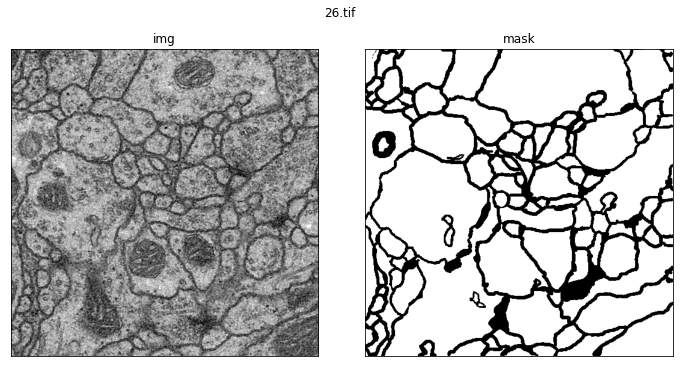

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(img, cmap="gray")
ax1.set_title("img")
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])

ax2.imshow(mask, cmap="gray")
ax2.set_title("mask")
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])
fig.suptitle(t=img_name, x=.5, y=1.)
plt.tight_layout()
plt.show()

In [8]:
def insert_grid(
    img: np.ndarray,
    box_height: int, 
    box_width: int, 
    color: float=1.,
    thickness: int=1.) -> np.ndarray:
    
    assert img.ndim == 2
    
    img = deepcopy(img)
    
    height, width = img.shape
    
    for x in range(0, width, box_width):
        cv2.line(
            img=img, pt1=(x, 0), pt2=(x, height), color=(color,), thickness=thickness)
    
    for y in range(0, height, box_height):
        cv2.line(
            img=img, pt1=(0, y), pt2=(width, y), color=(color,), thickness=thickness)
    
    return img

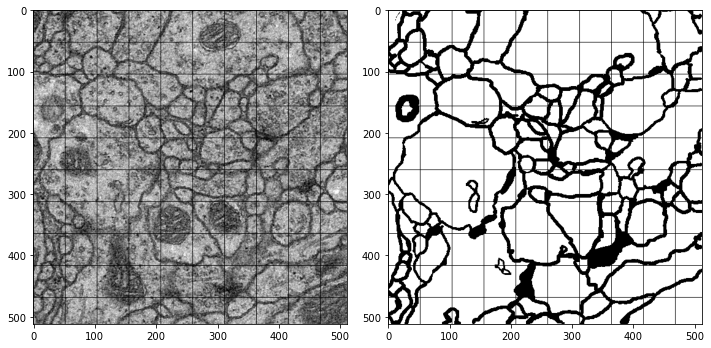

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5)) 
img = insert_grid(img[:,:,0], 52, 52, color=1, thickness=1)
ax1.imshow(img, cmap="gray")
mask = insert_grid(mask[:,:,0], 52, 52, color=1, thickness=1)
ax2.imshow(mask, cmap="gray")
plt.tight_layout()
plt.show()

## Affine + Elastic deformation

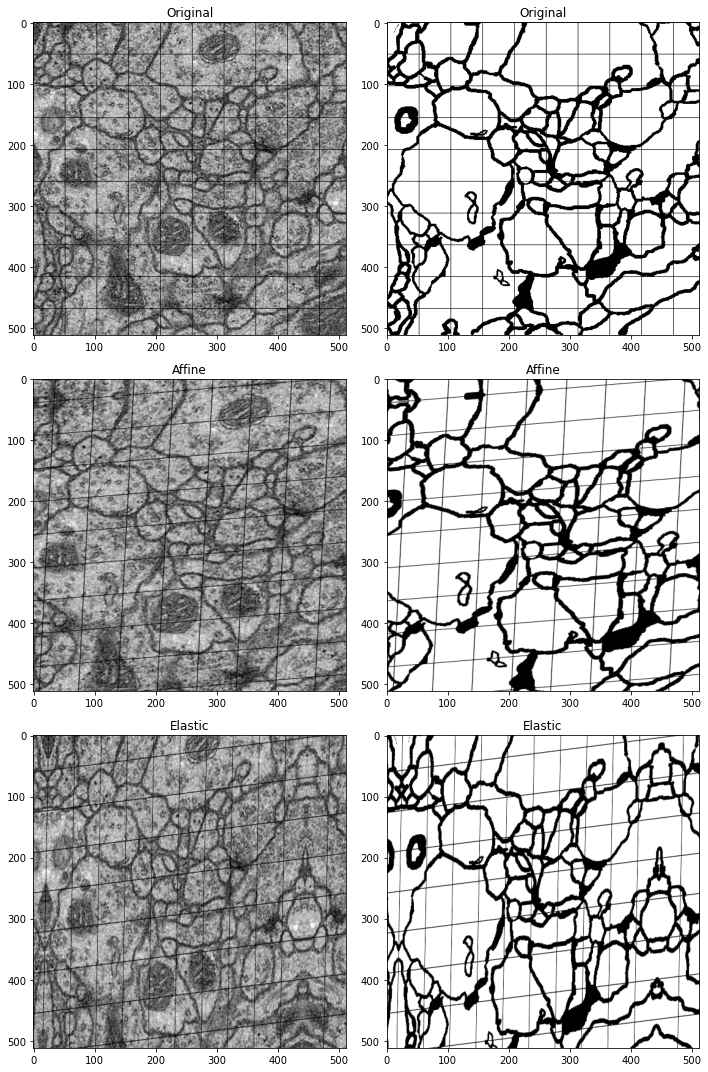

Wall time: 2.2 s


In [10]:
%%time
img =  cv2.imread(img_path)
img = img[:,:,0]
mask_path = os.path.join(TRAIN_LABELS_PATH, img_name)
mask = cv2.imread(mask_path)
mask = mask[:,:,0]
img = insert_grid(img, 52, 52, color=1, thickness=1)
mask = insert_grid(mask, 52, 52, color=1, thickness=1)

affine_trnsf_img, affine_trnsf_mask = custom_2d_elastic_deform(
    img, 
    mask, 
    alpha_affine=ALPHA_AFFINE,
    sigma=0,
    alpha=0)

elastic_trnsf_img, elastic_trnsf_mask = custom_2d_elastic_deform(
    img, 
    mask, 
    alpha_affine=ALPHA_AFFINE,
    sigma=SIGMA,
    alpha=ALPHA)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,15))
axes[0,0].set_title("Original")
axes[0,0].imshow(img, cmap="gray")

axes[0,1].set_title("Original")
axes[0,1].imshow(mask, cmap="gray")

axes[1,0].set_title("Affine")
axes[1,0].imshow(affine_trnsf_img, cmap="gray")

axes[1,1].set_title("Affine")
axes[1,1].imshow(affine_trnsf_mask, cmap="gray")

axes[2,0].set_title("Elastic")
axes[2,0].imshow(elastic_trnsf_img, cmap="gray")

axes[2,1].set_title("Elastic")
axes[2,1].imshow(elastic_trnsf_mask, cmap="gray")

plt.tight_layout()
plt.show()

In [11]:
np.unique(mask, return_counts=True)

(array([  0,   1, 255], dtype=uint8),
 array([ 52406,  10140, 199598], dtype=int64))

In [12]:
np.unique(elastic_trnsf_mask, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

## Checking pixel values without inserting grid

Need to bring pixels into {0, 255}

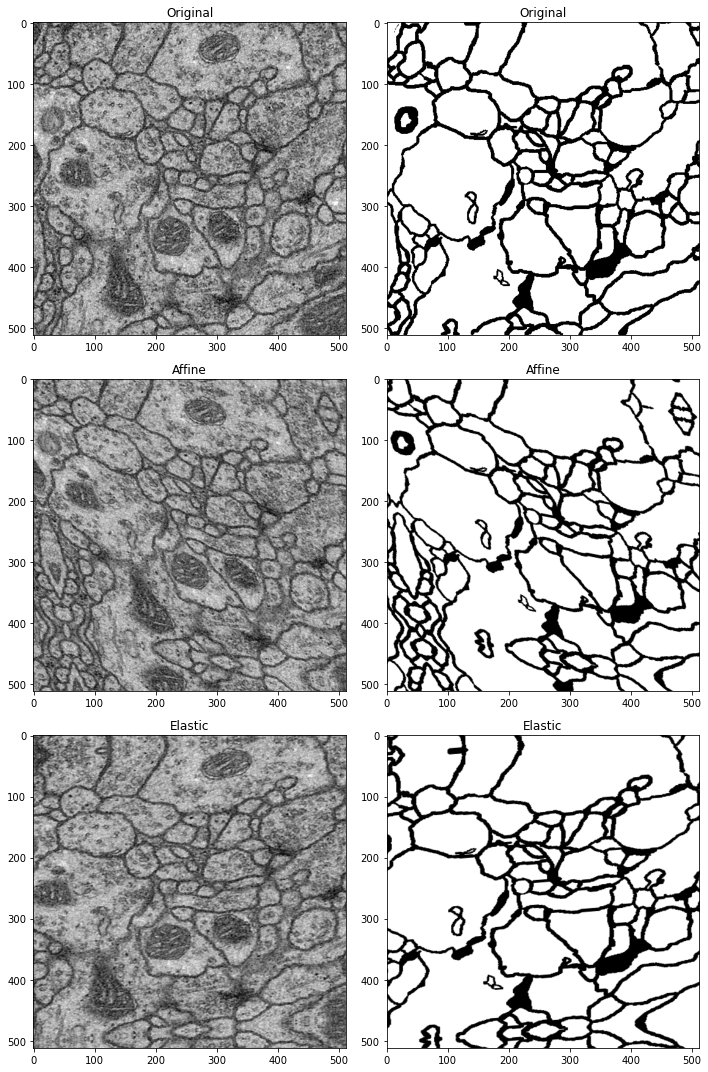

Wall time: 2.12 s


In [13]:
%%time
img =  cv2.imread(img_path)
img = img[:,:,0]
mask_path = os.path.join(TRAIN_LABELS_PATH, img_name)
mask = cv2.imread(mask_path)
mask = mask[:,:,0]

affine_trnsf_img, affine_trnsf_mask = custom_2d_elastic_deform(
    img, 
    mask, 
    alpha_affine=ALPHA_AFFINE,
    sigma=0,
    alpha=0)

elastic_trnsf_img, elastic_trnsf_mask = custom_2d_elastic_deform(
    img, 
    mask, 
    alpha_affine=ALPHA_AFFINE,
    sigma=SIGMA,
    alpha=ALPHA)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,15))
axes[0,0].set_title("Original")
axes[0,0].imshow(img, cmap="gray")

axes[0,1].set_title("Original")
axes[0,1].imshow(mask, cmap="gray")

axes[1,0].set_title("Affine")
axes[1,0].imshow(affine_trnsf_img, cmap="gray")

axes[1,1].set_title("Affine")
axes[1,1].imshow(affine_trnsf_mask, cmap="gray")

axes[2,0].set_title("Elastic")
axes[2,0].imshow(elastic_trnsf_img, cmap="gray")

axes[2,1].set_title("Elastic")
axes[2,1].imshow(elastic_trnsf_mask, cmap="gray")

plt.tight_layout()
plt.show()

In [14]:
np.unique(mask, return_counts=True)

(array([  0, 255], dtype=uint8), array([ 54360, 207784], dtype=int64))

In [15]:
np.unique(elastic_trnsf_mask, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

Here we can see that pixel values for mask does not belong to {0, 255}

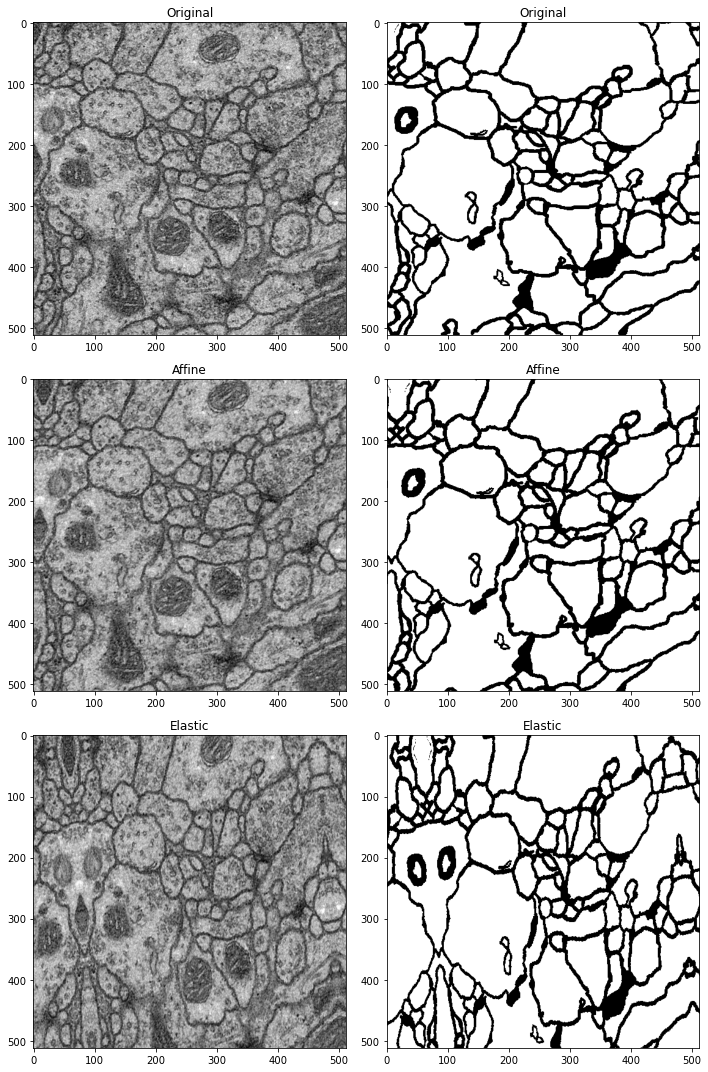

Wall time: 2.1 s


In [16]:
%%time
img =  cv2.imread(img_path)
img = img[:,:,0]
mask_path = os.path.join(TRAIN_LABELS_PATH, img_name)
mask = cv2.imread(mask_path)
mask = mask[:,:,0]

affine_trnsf_img, affine_trnsf_mask = custom_2d_elastic_deform(
    img, 
    mask, 
    alpha_affine=ALPHA_AFFINE,
    sigma=0,
    alpha=0,
    adjustment_pixel_range=ADJUSTMENT_PIXEL_RANGE, 
    adjusted_pixel=ADJUSTED_PIXEL)

elastic_trnsf_img, elastic_trnsf_mask = custom_2d_elastic_deform(
    img, 
    mask, 
    alpha_affine=ALPHA_AFFINE,
    sigma=SIGMA,
    alpha=ALPHA,
    adjustment_pixel_range=ADJUSTMENT_PIXEL_RANGE, 
    adjusted_pixel=ADJUSTED_PIXEL)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,15))
axes[0,0].set_title("Original")
axes[0,0].imshow(img, cmap="gray")

axes[0,1].set_title("Original")
axes[0,1].imshow(mask, cmap="gray")

axes[1,0].set_title("Affine")
axes[1,0].imshow(affine_trnsf_img, cmap="gray")

axes[1,1].set_title("Affine")
axes[1,1].imshow(affine_trnsf_mask, cmap="gray")

axes[2,0].set_title("Elastic")
axes[2,0].imshow(elastic_trnsf_img, cmap="gray")

axes[2,1].set_title("Elastic")
axes[2,1].imshow(elastic_trnsf_mask, cmap="gray")

plt.tight_layout()
plt.show()

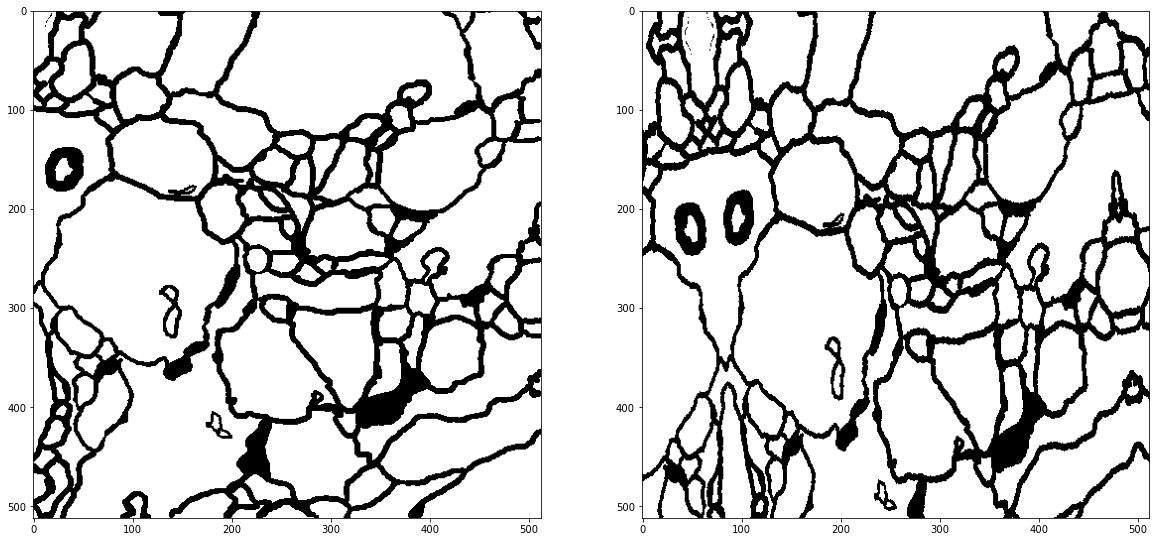

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
ax1.imshow(mask, cmap="gray")
ax2.imshow(elastic_trnsf_mask, cmap="gray")
plt.show()

In [18]:
np.unique(mask, return_counts=True)

(array([  0, 255], dtype=uint8), array([ 54360, 207784], dtype=int64))

In [19]:
np.unique(elastic_trnsf_mask, return_counts=True)

(array([  0, 255]), array([ 58363, 203781], dtype=int64))